In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.datasets.mnist import load_data

Using TensorFlow backend.


In [3]:
(train_digits,train_labels),(test_digits,test_labels)=load_data()
print(train_digits.shape)
print(test_digits.shape)

11493376/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [4]:
import pandas as pd
pd.Series(train_labels).value_counts

<bound method IndexOpsMixin.value_counts of 0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Length: 60000, dtype: uint8>

In [5]:
pd.Series(test_labels).value_counts

<bound method IndexOpsMixin.value_counts of 0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Length: 10000, dtype: uint8>

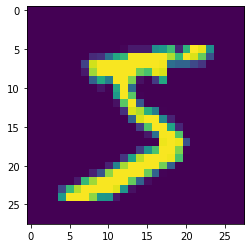

In [6]:
plt.imshow(train_digits[0])

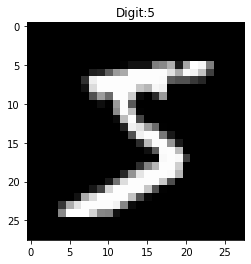

In [7]:
plt.title("Digit:"+str(train_labels[0]))
plt.imshow(train_digits[0],cmap="gray")

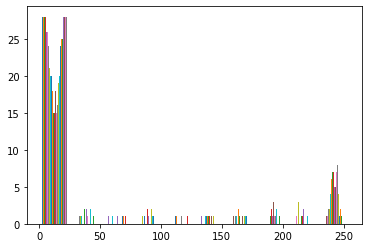

In [8]:
plt.hist(train_digits[0])
plt.show()

In [9]:
samp=np.random.randint(train_digits.shape[0],size=16)
samp

array([44755, 47813, 38578, 49728, 17231, 39107, 48908, 23641, 58359,
       44331, 13999, 42303, 15255,  1877, 39408, 54044])

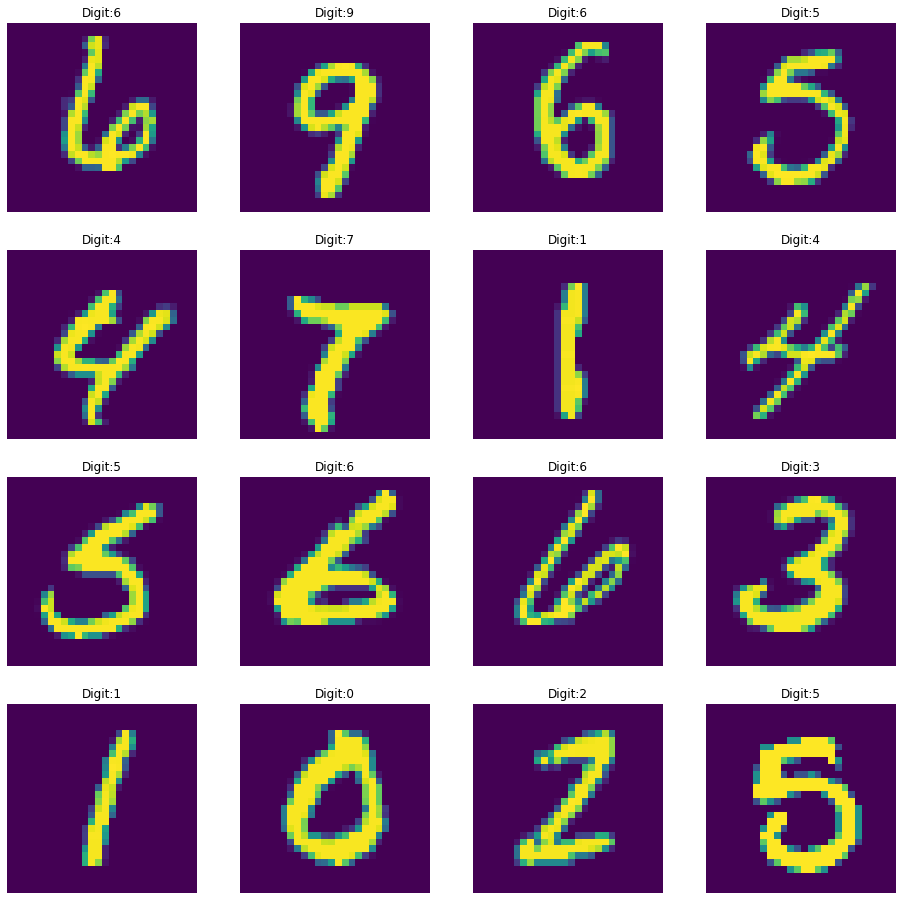

In [10]:
plt.figure(figsize=(16,16))
j=1
for i in samp:
  plt.subplot(4,4,j)
  plt.imshow(train_digits[i])
  plt.title("Digit:"+str(train_labels[i]))
  plt.axis("off")
  j=j+1

In [11]:
train_digits_sc=train_digits/255.0
test_digits_sc=test_digits/255.0

In [12]:
from keras.utils import to_categorical

In [13]:
train_labels_cat=to_categorical(train_labels)

In [14]:
test_labels_cat=to_categorical(test_labels)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(train_digits_sc,train_labels_cat,test_size=0.1,random_state=32)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(54000, 28, 28)
(6000, 28, 28)
(54000, 10)
(6000, 10)


In [16]:

from keras.models import Sequential
from keras.layers import Dense,Flatten

model = Sequential()
# first layer we need to mention the input shape

model.add(Flatten(input_shape=(28,28)))
## 784 pixel values as input to this Dense. 128 Neurons in the layers
model.add(Dense(128,activation='relu'))# 784 * 128+128
model.add(Dense(128,activation='relu'))# 
model.add(Dense(64,activation='relu'))
model.add(Dense(256,activation='relu'))
#Final layer
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 144,458
Trainable params: 144,458
Non-trainable params: 0
________________________________________________

In [17]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [18]:
history=model.fit(x=x_train,y=y_train,epochs=5,validation_data=(x_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 6s 108us/step - loss: 0.2487 - accuracy: 0.9247 - val_loss: 0.1506 - val_accuracy: 0.9533
Epoch 2/5
54000/54000 [==============================] - 5s 101us/step - loss: 0.1133 - accuracy: 0.9663 - val_loss: 0.1052 - val_accuracy: 0.9715
Epoch 3/5
54000/54000 [==============================] - 5s 100us/step - loss: 0.0810 - accuracy: 0.9754 - val_loss: 0.1181 - val_accuracy: 0.9650
Epoch 4/5
54000/54000 [==============================] - 6s 102us/step - loss: 0.0650 - accuracy: 0.9796 - val_loss: 0.1146 - val_accuracy: 0.9673
Epoch 5/5
54000/54000 [==============================] - 5s 100us/step - loss: 0.0537 - accuracy: 0.9836 - val_loss: 0.0923 - val_accuracy: 0.9750


In [19]:
model.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 28us/step


[0.08778220076828439, 0.9747999906539917]

In [20]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [21]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[1.5832203e-09, 1.6325016e-06, 2.1278183e-07, 2.0785840e-06,
        2.4140195e-07, 1.9290848e-08, 7.4207506e-12, 9.9960381e-01,
        3.5174926e-07, 3.9163380e-04]], dtype=float32)

In [22]:
model.predict(test_digits_sc[:10])

array([[1.5832264e-09, 1.6325079e-06, 2.1278264e-07, 2.0785940e-06,
        2.4140286e-07, 1.9290921e-08, 7.4207645e-12, 9.9960381e-01,
        3.5175060e-07, 3.9163511e-04],
       [7.8671852e-10, 9.8837722e-07, 9.9999559e-01, 2.0116202e-06,
        1.7219144e-09, 3.0102718e-09, 2.1280361e-10, 1.4594597e-06,
        2.9595082e-08, 2.6706460e-11],
       [3.8291064e-09, 9.9995410e-01, 8.4892355e-07, 7.0110264e-09,
        1.3087472e-06, 5.1362221e-08, 4.9165624e-07, 1.5383392e-05,
        2.7738712e-05, 1.4847929e-07],
       [9.9974257e-01, 1.2380682e-08, 6.4459118e-06, 3.7665765e-07,
        4.0795539e-06, 1.2392153e-06, 1.8166953e-04, 2.5915881e-07,
        2.1272617e-05, 4.2129905e-05],
       [1.5883833e-07, 3.9720664e-05, 5.0875433e-06, 3.2354460e-08,
        9.9949789e-01, 1.2762489e-06, 1.4334188e-05, 7.6191594e-05,
        7.7957077e-07, 3.6449888e-04],
       [8.4666328e-12, 9.9999809e-01, 2.0506914e-09, 6.7019901e-12,
        8.5092445e-08, 7.8410153e-11, 1.6906569e-09, 1.57

In [23]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])

In [24]:
model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[1.5832203e-09, 1.6325016e-06, 2.1278183e-07, 2.0785840e-06,
        2.4140195e-07, 1.9290848e-08, 7.4207506e-12, 9.9960381e-01,
        3.5174926e-07, 3.9163380e-04]], dtype=float32)

In [25]:
history.history

{'accuracy': [0.9246852, 0.9663148, 0.9754074, 0.97962964, 0.9835741],
 'loss': [0.24870820126875684,
  0.11325055391189677,
  0.08100497318652493,
  0.06503125197890525,
  0.05365401581997759],
 'val_accuracy': [0.95333331823349,
  0.9714999794960022,
  0.9649999737739563,
  0.9673333168029785,
  0.9750000238418579],
 'val_loss': [0.15057422425349554,
  0.10520539754877488,
  0.11807408006985982,
  0.11462893854888777,
  0.09226688439763772]}

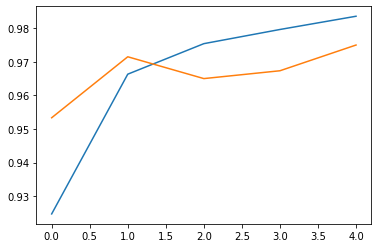

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [27]:
model2 = Sequential()
# first layer we need to mention the input shape

model2.add(Flatten(input_shape=(28,28)))
## 784 pixel values as input to this Dense. 128 Neurons in the layers
model2.add(Dense(128,activation='relu'))# 784 * 128+128
model2.add(Dense(256,activation='relu'))# 
model2.add(Dense(64,activation='relu'))
model2.add(Dense(256,activation='relu'))
#Final layer
model2.add(Dense(10,activation='sigmoid'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total params: 169,162
Trainable params: 169,162
Non-trainable params: 0
________________________________________________

In [28]:
model2.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [29]:
history=model2.fit(x=x_train,y=y_train,epochs=5,validation_data=(x_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 6s 120us/step - loss: 0.2613 - accuracy: 0.9214 - val_loss: 0.1568 - val_accuracy: 0.9573
Epoch 2/5
54000/54000 [==============================] - 6s 117us/step - loss: 0.1119 - accuracy: 0.9656 - val_loss: 0.1083 - val_accuracy: 0.9678
Epoch 3/5
54000/54000 [==============================] - 6s 113us/step - loss: 0.0795 - accuracy: 0.9759 - val_loss: 0.1274 - val_accuracy: 0.9627
Epoch 4/5
54000/54000 [==============================] - 6s 115us/step - loss: 0.0635 - accuracy: 0.9803 - val_loss: 0.1034 - val_accuracy: 0.9715
Epoch 5/5
54000/54000 [==============================] - 6s 116us/step - loss: 0.0509 - accuracy: 0.9843 - val_loss: 0.1099 - val_accuracy: 0.9713


In [30]:
model2.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 27us/step


[0.11845310760778376, 0.9682999849319458]

In [31]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [32]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[1.5832203e-09, 1.6325016e-06, 2.1278183e-07, 2.0785840e-06,
        2.4140195e-07, 1.9290848e-08, 7.4207506e-12, 9.9960381e-01,
        3.5174926e-07, 3.9163380e-04]], dtype=float32)

In [33]:
model.predict(test_digits_sc[:10])

array([[1.5832264e-09, 1.6325079e-06, 2.1278264e-07, 2.0785940e-06,
        2.4140286e-07, 1.9290921e-08, 7.4207645e-12, 9.9960381e-01,
        3.5175060e-07, 3.9163511e-04],
       [7.8671852e-10, 9.8837722e-07, 9.9999559e-01, 2.0116202e-06,
        1.7219144e-09, 3.0102718e-09, 2.1280361e-10, 1.4594597e-06,
        2.9595082e-08, 2.6706460e-11],
       [3.8291064e-09, 9.9995410e-01, 8.4892355e-07, 7.0110264e-09,
        1.3087472e-06, 5.1362221e-08, 4.9165624e-07, 1.5383392e-05,
        2.7738712e-05, 1.4847929e-07],
       [9.9974257e-01, 1.2380682e-08, 6.4459118e-06, 3.7665765e-07,
        4.0795539e-06, 1.2392153e-06, 1.8166953e-04, 2.5915881e-07,
        2.1272617e-05, 4.2129905e-05],
       [1.5883833e-07, 3.9720664e-05, 5.0875433e-06, 3.2354460e-08,
        9.9949789e-01, 1.2762489e-06, 1.4334188e-05, 7.6191594e-05,
        7.7957077e-07, 3.6449888e-04],
       [8.4666328e-12, 9.9999809e-01, 2.0506914e-09, 6.7019901e-12,
        8.5092445e-08, 7.8410153e-11, 1.6906569e-09, 1.57

In [34]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])

In [35]:
model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[1.5832203e-09, 1.6325016e-06, 2.1278183e-07, 2.0785840e-06,
        2.4140195e-07, 1.9290848e-08, 7.4207506e-12, 9.9960381e-01,
        3.5174926e-07, 3.9163380e-04]], dtype=float32)

In [36]:
history.history

{'accuracy': [0.92142594, 0.96562964, 0.9758889, 0.9802778, 0.98425925],
 'loss': [0.2612568941822758,
  0.11185104519032218,
  0.07952088880166411,
  0.06345584325961492,
  0.050853002515474886],
 'val_accuracy': [0.9573333263397217,
  0.9678333401679993,
  0.9626666903495789,
  0.9714999794960022,
  0.9713333249092102],
 'val_loss': [0.15678693435589472,
  0.10826825280487537,
  0.127429604186366,
  0.10339255045664807,
  0.10991885401681066]}

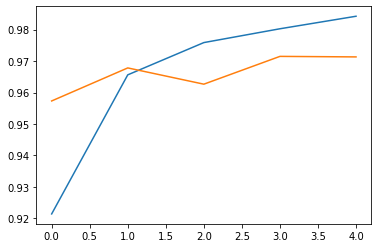

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])